Sample Data:
      sepal_length  sepal_width  petal_length  petal_width          species
90            5.5          2.6           4.4          1.2  Iris-versicolor
75            6.6          3.0           4.4          1.4  Iris-versicolor
130           7.4          2.8           6.1          1.9   Iris-virginica
107           7.3          2.9           6.3          1.8   Iris-virginica
54            6.5          2.8           4.6          1.5  Iris-versicolor

Species Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Accuracy: 92.11%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.9

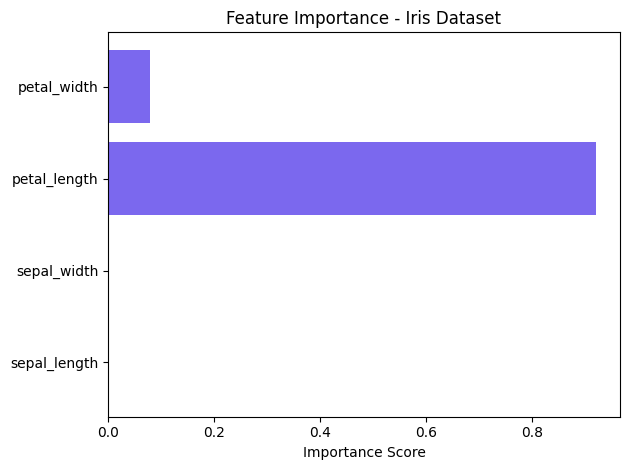

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("IRIS.csv")
print("Sample Data:\n", df.sample(5))
print("\nSpecies Distribution:\n", df['species'].value_counts())

encoder = LabelEncoder()
df['species_encoded'] = encoder.fit_transform(df['species'])

X = df.iloc[:, :4]                  
y = df['species_encoded']         


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)


predictions = model.predict(X_test)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, predictions) * 100))
print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=encoder.classes_))


feature_importance = model.feature_importances_
features = X.columns

plt.barh(features, feature_importance, color='mediumslateblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance - Iris Dataset")
plt.tight_layout()
plt.show()
